In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

In [8]:
dataset=pd.read_csv('globalterrorismdataset.csv',engine='python')

In [20]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
dataset=dataset[['eventid','iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound']]

In [10]:
dataset.rename(columns={'imonth': 'Month',
 'iyear': 'Year',
 'eventid': 'Event ID',
 'country_txt': 'Country',
 'region_txt': 'Region',
 'provstate': 'State',
 'city': 'City',
 'attacktype1_txt': 'Attack type',
 'targtype1_txt': 'Target',
 'natlty1_txt': 'Nationality',
 'gname': 'Terrorist Group',
 'weaptype1_txt': 'Weapon type',
 'weapsubtype1_txt': 'Weapon subtype',
 'nkill': 'Killed',
 'nwound': 'Wounded'},inplace=True)

In [23]:
dataset.head()

,Event ID,Year,Month,Country,Region,State,City,latitude,longitude,success,Attack type,Target,Nationality,Terrorist Group,Weapon type,Weapon subtype,Killed,Wounded
0,1.970000e+11,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Firearms,Rifle/Shotgun (non-automatic),1.0,0.0
1,1.970000e+11,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,NaN,0.0,0.0
2,1.970000e+11,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,United States,Unknown,Unknown,NaN,1.0,0.0
3,1.970000e+11,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,Unknown Explosive Type,NaN,NaN
4,1.970000e+11,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN,NaN,NaN


In [26]:
dataset['Weapon subtype']=dataset['Weapon subtype'].fillna(method="ffill")

In [27]:
dataset['longitude'],dataset['latitude']

(0         -69.951164
 1         -99.086624
 2         120.599741
 3          23.762728
 4         130.396361
 5         -89.176269
 6         -56.187214
 7        -122.225906
 8         -89.412488
 9         -89.386694
 10        -89.744299
 11       -104.876305
 12         12.490069
 13        -83.047924
 14        -66.061127
 15         13.401851
 16               NaN
 17        -73.931351
 18        -65.830948
 19       -122.331306
 20        -88.239270
 21        -56.187214
 22       -122.331306
 23       -122.331306
 24        -74.067467
 25        -90.529068
 26        121.057495
 27        -66.962128
 28        -96.413949
 29        -88.650419
              ...    
 181661     81.807490
 181662    126.449221
 181663     75.565432
 181664     -5.956210
 181665     81.497666
 181666     12.969724
 181667     36.368763
 181668     44.524705
 181669     44.375465
 181670     44.783524
 181671     44.070106
 181672     74.964225
 181673     70.449593
 181674     41.716717
 181675   

In [29]:
dataset['longitude']=dataset['longitude'].fillna((dataset['longitude'].mean()),inplace=True)
dataset['latitude']=dataset['latitude'].fillna((dataset['latitude'].mean()),inplace=True)


In [30]:
dataset['Killed']=dataset['Killed'].fillna(method="ffill")

In [31]:
dataset['Wounded']=dataset['Wounded'].fillna(method="ffill")

In [32]:
dataset.head()

,Event ID,Year,Month,Country,Region,State,City,latitude,longitude,success,Attack type,Target,Nationality,Terrorist Group,Weapon type,Weapon subtype,Killed,Wounded
0,1.970000e+11,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,None,None,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Firearms,Rifle/Shotgun (non-automatic),1.0,0.0
1,1.970000e+11,1970,0,Mexico,North America,Federal,Mexico city,None,None,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,Rifle/Shotgun (non-automatic),0.0,0.0
2,1.970000e+11,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,None,None,1,Assassination,Journalists & Media,United States,Unknown,Unknown,Rifle/Shotgun (non-automatic),1.0,0.0
3,1.970000e+11,1970,1,Greece,Western Europe,Attica,Athens,None,None,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,Unknown Explosive Type,1.0,0.0
4,1.970000e+11,1970,1,Japan,East Asia,Fukouka,Fukouka,None,None,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,Unknown Explosive Type,1.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

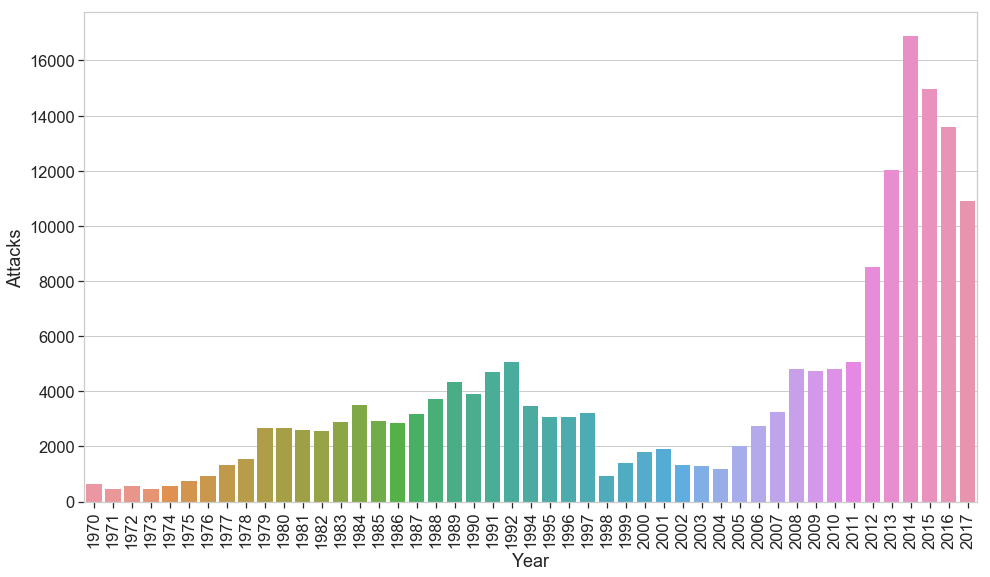

In [33]:
# No. of attacks worldwide (1970 - 2017)

sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=dataset['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

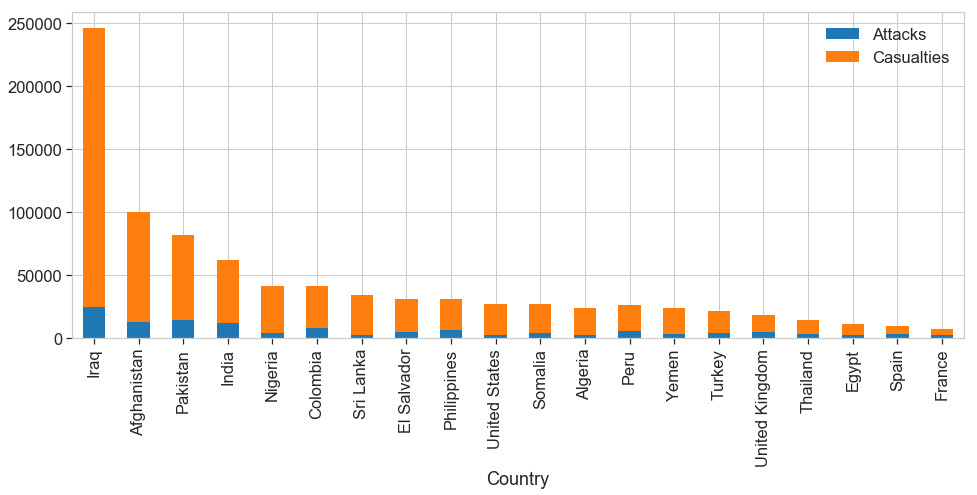

In [34]:
#most affected countries
dataset['Casualties']=dataset['Killed']+dataset['Wounded']
dataset[dataset['Country'].isin(dataset['Country'].value_counts()[0:20].index)][['Casualties','Country']].groupby('Country').sum().reset_index().sort_values(by='Casualties',ascending=False).merge(dataset[dataset['Country'].isin(dataset['Country'].value_counts()[0:20].index)]['Country'].value_counts().to_frame().reset_index().rename(columns={'index':'Country','Country':'Attacks'}), on='Country').plot.bar(x='Country',y=['Attacks','Casualties'],figsize=(16,6),stacked=True)

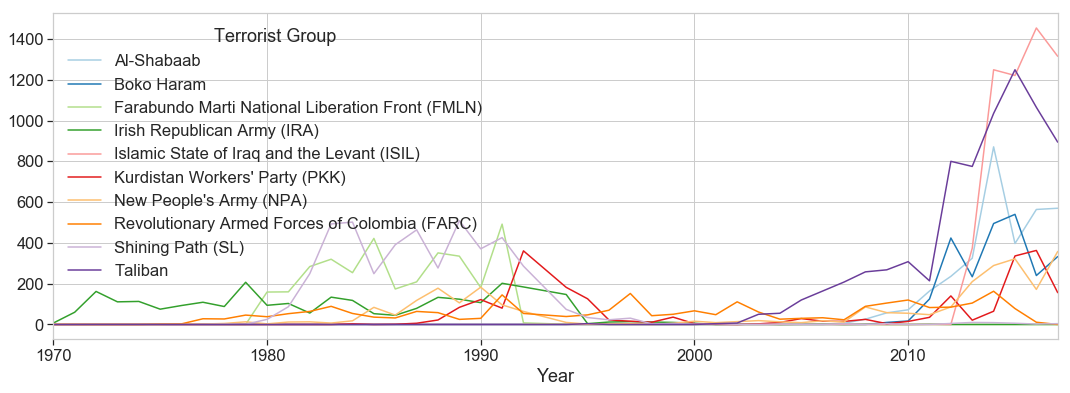

In [37]:
# Activities of top 10 terrorist groups in past years.
pd.crosstab(dataset[dataset['Terrorist Group'].isin(dataset['Terrorist Group'].value_counts()[1:11].index)]['Year'],dataset[dataset['Terrorist Group'].isin(dataset['Terrorist Group'].value_counts()[1:11].index)]['Terrorist Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6))


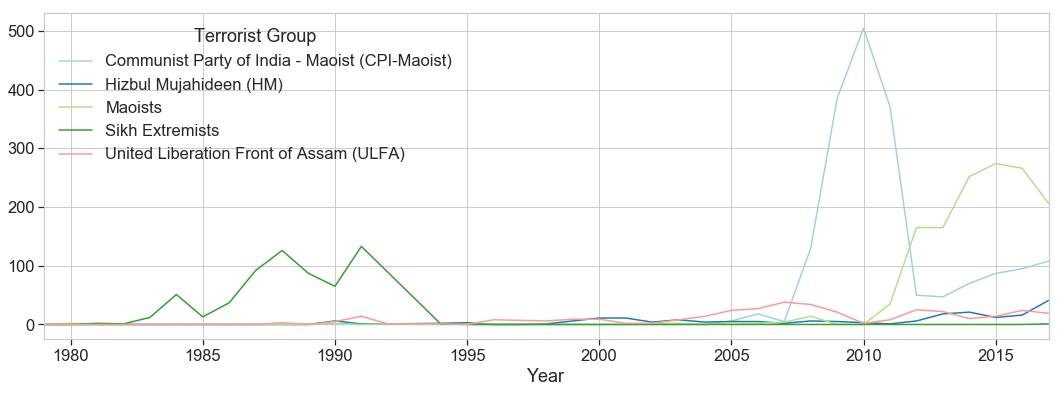

In [38]:
# Activities of top 10 terrorist groups in past years in INDIA
India=dataset[dataset['Country']=='India']
pd.crosstab(India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[1:6].index)]['Year'],India[India['Terrorist Group'].isin(India['Terrorist Group'].value_counts()[1:6].index)]['Terrorist Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6))


Text(0, 0.5, 'Attacks')

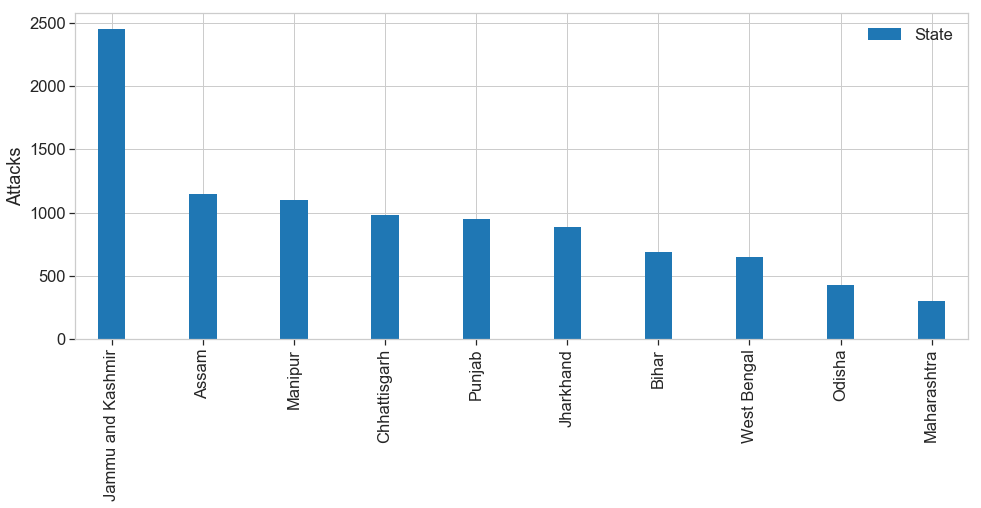

In [39]:
#most affected areas in INDIA
India[India['State'].isin(India['State'].value_counts()[0:10].index)]['State'].value_counts().to_frame().plot.bar(figsize=(16,6),width=0.3)
plt.ylabel('Attacks')

Text(0, 0.5, 'Attacks')

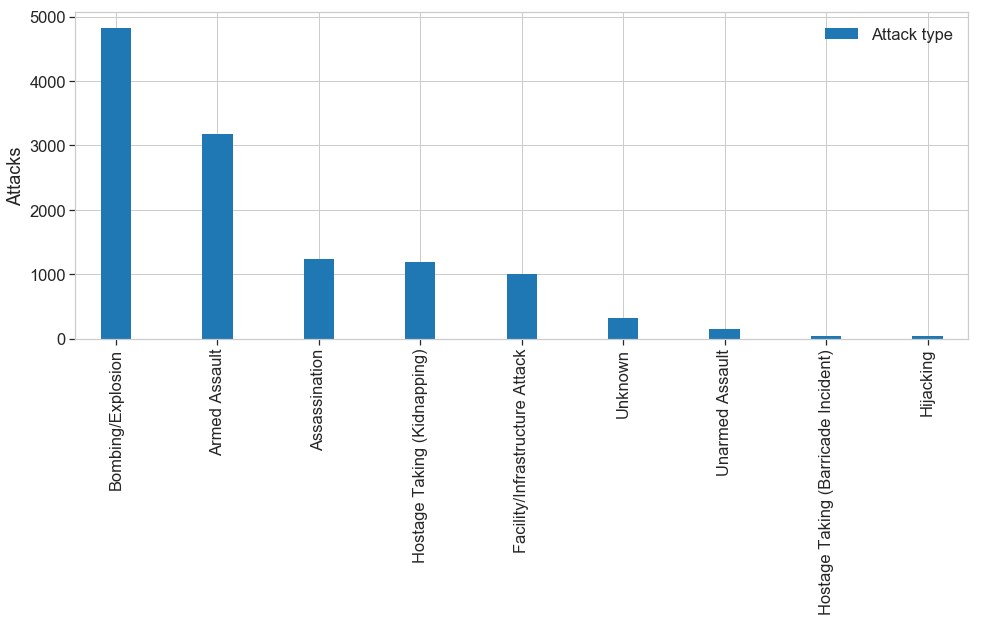

In [40]:
India[India['Attack type'].isin(India['Attack type'].value_counts()[0:10].index)]['Attack type'].value_counts().to_frame().plot.bar(figsize=(16,6),width=0.3)
plt.ylabel('Attacks')

In [47]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import numpy as np
import random
def Rand(start, end, num): 
    res = []
    for j in range(num): 
        res.append(random.randint(start, end))
    return res 
mean_p=dataset['success'].mean()
std_p=dataset['success'].std()
l=Rand(1,180000,1000)
mean_s=0
for i in l:
    mean_s+=dataset['success'][i]
mean_s=mean_s/len(l)
print(mean_s)
st=std_p/(np.sqrt(1000))
zstat=(mean_s-mean_p)/st
print(zstat)
if zstat<1.96 and zstat>-1.96:
    print("Null Hypothesis is plausible")
else:
    print("Null Hypothesis should be rejected")

0.889
-0.06036900691571235
Null Hypothesis is plausible


In [57]:
d1=dataset[['Year','Wounded','Killed']]
d1.corr(method='pearson',min_periods=1)

,Year,Wounded,Killed
Year,1.000000,0.016678,0.009641
Wounded,0.016678,1.000000,0.418891
Killed,0.009641,0.418891,1.000000


In [11]:
dataset['Killed']=dataset['Killed']/dataset['Killed'].max()